<h1> DNA의 무작위 염기서열 생성
<h4> 파이썬의 random()을 이용하여 DNA 염기서열을 무작위로 생성하는 방법

In [ ]:
#우송대학교_202110716_백지원

import random

# 생성하고자 하는 DNA의 길이
len_seq = 10

# 빈 문자열을 생성
dna_seq=''

# A, C, G, T 중 하나를 무작위로 선택하여 DNA 염기서열을 생성하여 dna_seq에 추가
for i in range(len_seq):
    dna_seq += random.choice('ACGT')

print(dna_seq)

CTTCCCTGAG


<h4> 리스트 컴프리헨션을 이용하여 DNA 염기서열을 생성하는 방법

In [2]:
# 생성하고자 하는 DNA의 길이
len_seq = 10

# 리스트 컴프리헨션을 사용하여 DNA 염기서열을 생성
seq = [random.choice('ACGT') for i in range(len_seq)]
print(f'{seq = }')

#리스트를 문자열로 변환
dna_seq = ''.join(seq)
print(f'{dna_seq = }')

seq = ['G', 'G', 'C', 'G', 'A', 'A', 'A', 'T', 'A', 'T']
dna_seq = 'GGCGAAATAT'


<h4> numpy의 randomm.choice()를 이용하여 일정 비율로 A, T, C, G를 선택하여 BNA 염기서열열을 생성하는 방법

In [3]:
import numpy as np

# 생성하고자 하는 DNA의 길이와 각 염기의 확률
len_seq = 10
nucleotides = ['A', 'T', 'C', 'G']
ratio = [0.1, 0.2, 0.3, 0.4]

# A, T, C, G를 각 확률에 따라 랜덤하게 생성 -> numpy array로 반환
seq = np.random.choice(nucleotides, len_seq, p=ratio)
print(f'{seq = }')

# 리스트를 문자열로 변환
dna_seq = ''.join(seq)
print(f'{dna_seq = }')

seq = array(['G', 'T', 'C', 'T', 'T', 'A', 'G', 'A', 'G', 'G'], dtype='<U1')
dna_seq = 'GTCTTAGAGG'


<h4> DNA염기서열의 길이 확인

In [4]:
len_seq = 50
nucleotides = ['A', 'T', 'C', 'G']
ratio = [0.15, 0.25, 0.4, 0.2]

dna_seq = ''.join(np.random.choice(nucleotides, len_seq, p=ratio))
len(dna_seq)

50

<h1>뉴크레오티드 빈도 계산 및 시각화
<h2>뉴클레오티드 빈도 계산
<h4>주어진 DNA 염기서열에서 각 뉴클레오티드(A, T, C, G)의 빈도를 계산
<h4>게놈의 전반적인 균형 또는 편향을 파악하는데 유용

In [5]:
# 딕셔너리의 동작 원리 이해

# A, B 염기의 개수를 저장할 딕셔너리 생성
num_nucleotide = {'A': 0, 'B':0}
print(f'{num_nucleotide = }')


num_nucleotide = {'A': 0, 'B': 0}


In [6]:

# A 염기가 딕셔너리의 키로 존재하는지 확인
print(f'{"A" in num_nucleotide = }')

# 키가 A인 염기의 값을 출력
print(f'{num_nucleotide["A"] = }')

# A 염기의 개수를 1 증가
num_nucleotide['A'] =+ 1

# B 염기의 개수를 10 증가
num_nucleotide['B'] += 10

"A" in num_nucleotide = True
num_nucleotide["A"] = 0


In [7]:
# DNA 염기서열에서 각 염기의 개수를 세는 함수
def count_nucleotides(seq):

    # A, T, C, G의 개수를 저장할 딕셔너리 생성
    num_nucleotides = {'A' : 0, 'T' : 0 , 'C' : 0, 'G' : 0}

    # DNA 염기서열에서 각 염기를 하나씩 읽어서 딕셔너리에 추가
    for nucleotide in seq:
        # 딕셔너리에 해당 염기가 있으면 개수를 1 증가
        if nucleotide in num_nucleotides:
            num_nucleotides[nucleotide] += 1

    # 결과를 반환
    return num_nucleotides
        
# dna_seq에서 각 염기의 개수를 세는 함수 호출
dict_nucleotide = count_nucleotides(dna_seq)

# 결과 출력
print(dict_nucleotide)

{'A': 9, 'T': 8, 'C': 20, 'G': 13}


<h1>뉴클레오티드 빈도 시각화
<h4>seaborn 라이브러리는 데이터 프레임이 다루기 용이하므로 딕셔너리를 데이터프레임으로 변환

In [8]:
# 데이터프레임 사용을 위한 라이브러리 임포트
import pandas as pd

# 시각화를 위한 라이브러리 임포트
import seaborn as sns
import matplotlib.pyplot as plt

# DNA 염기서열을 데이터프레임으로 변환
df_nucleotide = pd.DataFrame(

    # 딕셔너리의 키를 인덱스로, 같은 데이터로 사용
    index = dict_nucleotide.keys(),
    data = dict_nucleotide.values(),

    # 열 이름을 count로 지정
    columns = ['count']
    )

# 데이터프레임 출력
display(df_nucleotide)


,count
A,9
T,8
C,20
G,13


In [9]:
# 각 염기의 개수를 비율로 계산하여 새로운 열 ratio로 추가
df_nucleotide = df_nucleotide.assign(
    ratio = df_nucleotide['count'] / df_nucleotide['count'].sum()
    )

# 데이터프레임 출력
display(df_nucleotide)


,count,ratio
A,9,0.18
T,8,0.16
C,20,0.40
G,13,0.26


<h4>뉴클레오티드(A, T, C, G)의 빈도를 막대 그래프로 시각화

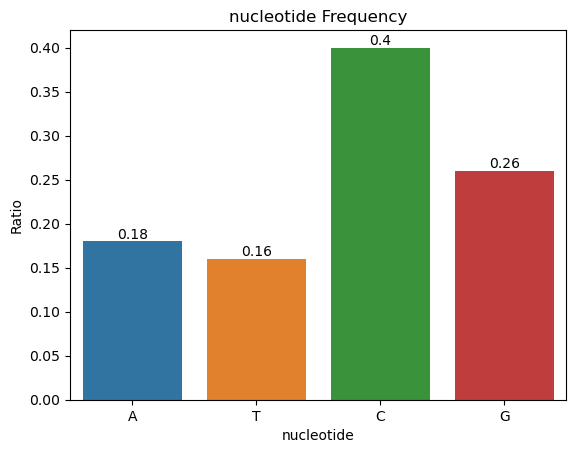

In [10]:
# 막대 그래프 객체를 생성
ax = sns.barplot(
    df_nucleotide,              #사용할 데이터프레임명
    x=df_nucleotide.index,      # x축에 사용할 열 이름
    y='ratio',                  # y축에 사용할 열 이름
    hue=df_nucleotide.index,    # 막대 그래프 색상을 다르게 표시할 이름
    order=df_nucleotide.index   # x축에 표시할 순서
    )

# 그래프 제목 설정
ax.set_title('nucleotide Frequency')

# x축 레이블 설정
ax.set_xlabel('nucleotide')

# y축 레이블 설정
ax.set_ylabel('Ratio')

# 긴 막대 그래프에 비율을 표시. container는 막대 그래프 객체
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# 그래프 출력
plt.show()    

<h1> 함량 계산
<h3> GC 함량(GC-Content)

<h4> GC 함량은 DNA 또는 RNA에서의 구아닌과 사이토신의 백분율
<h4> GC 함량은 DNA의 안정성과 상관관계가 있으면, 생물정보학 및 분자생물학의 기본 지표
<h4> GC함량이 높을수록 DNA의 밀도와 안정성이 높은
<h4> GC는 3개의 소수결합A-T는 2개의 수소 결합을 형성하나 안정성과는 크게 관련이 없다고 함
<h4> GC 함량이 높을수록 유전자가 풍부한 영역을 나타내는 경우가 많고, GC 함량이 낮으면 반복적이거나 암호화되지 않은 영역을 나타낼 수 있음
<h4> 같은 종은 고유한 GC%를 가지고 있어서 중 간 GC 함량을 비교하여 유기체를 식별하고 계통발생학적으로 분류하는데 사용할 수 있음

<h4>GC 함량 계산

In [11]:
# DNA 염기서열에서 GC content를 계산하는 함수 정의
def calculateGCCOntent(seq):

    # sec에서 G, C의 개수를 세어 gc_count에 저장
    gc_count = seq.count('G') + seq.count('C')

    #gc_count를 seq의 길이로 나누어 GC content를 계싼
    return (gc_count / len(seq)) * 100

# DNA 염기서열에서 GC content 게산
gc_content = calculateGCCOntent(dna_seq)

# GC content 출력, 소수점 2자리까지 표시
print(f"GC Content: {gc_content:.2f}%")

GC Content: 66.00%


<h1>구간별 GC 함량 변화 계산 및 시각화
<h4>일정한 구간에 대한 GC함량을 계산

In [12]:
def calculateGCCOntentSliding(seq, window_size=10):

    # 구간 크기에 따른 시작점 계산
    start_points = range(0, len(seq) - window_size + 1, window_size)

    # 구간별 GX content를 계산하여 리스트로 저장
    gc_values = [calculateGCCOntent(seq[i:i+window_size]) for i in start_points]

    return pd.DataFrame({'position': start_points, 'GC Content': gc_values})

# DNA 염기서열에서 일정한 구간을 나누어 GC content 계산
window_size = 10
df_gc_content = calculateGCCOntentSliding(dna_seq, window_size)

# GC content 출력
display(df_gc_content.head())

,position,GC Content
0,0,60.0
1,10,40.0
2,20,80.0
3,30,80.0
4,40,70.0


<h3>전체 DNA 염기서열에 대한 GC 함량의 박스플롯 시각화
<h4>박스플롯은 데이터의 중앙값, 사분위수, 국단값을 시각화하여 데이터의 분포를 파악하는데 유용
<h4>박스플롯을 통해 DNA 염기서열의 GC 함량 분호를 파악

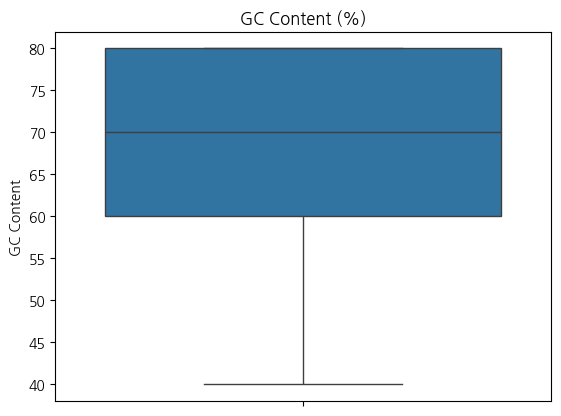

In [13]:
import koreanize_matplotlib

sns.boxplot(
    data=df_gc_content,
    y='GC Content'
    )

# 그래프 제목 설정
plt.title('GC Content (%)')

# 그래프 출력
plt.show()

<h3>전체 DNA 염기서열에 대한 GC 함량의 변화를 시각화
<h4>GC 함량에서의 변화는 특정 기능 또는 생물학적 중용성을 나타낼 수 있음

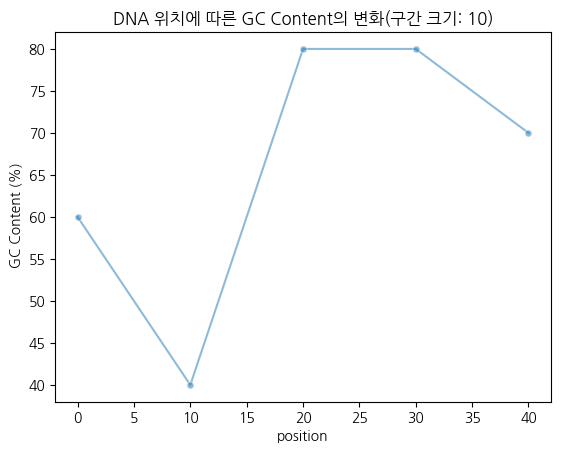

In [14]:
sns.lineplot(
    data=df_gc_content, # 사용할 데이터프레임명
    x='position',       # x축에 사용할 열 이름
    y='GC Content',     # y축에 사용할 열 이름
    marker='o',         # 마커 표시
    markersize=5,       # 마커 크기
    alpha=0.5           # 투명도 설정
    );

# 그래프 제목 설정
plt.title(f'DNA 위치에 따른 GC Content의 변화(구간 크기: {window_size})')

# x축 레이블 설정
plt.xlabel('position')

# y축 레이블 설정
plt.ylabel(' GC Content (%)')

# 그래프 출력
plt.show()

<h1> A-T/G-C 비율

<h4>DNA의 염기서열은 Adhk T, C와 G가 서로 상보적인 관계를 가짐
<h4>A/T=G/C비율은 각 생물에 따라 다름
<h4>고등동물: 42% 전후의 좁은 범위의 값
<h4>세균: 25~75%로 종에 따른 차이가 큼

<h2>A-T/G-C 비율 계산

In [15]:
# DNA 염기서열에서 GC content를 계산하는 함수 정의
def calculateATGCRaio(seq):

    # sec에서 A, T의 개수를 세어 at_count에 저장
    at_count = seq.count('A') + seq.count('T')

    # sec에서 G, C의 개수를 세어 gc_count에 저장
    gc_count = seq.count('G') + seq.count('C')

    # at_count를  gc_count로 나누어 AT/GC비율을 계싼
    return (at_count / gc_count) * 100

# DNA 염기서열에서 AT/GC 비율 계싼
atgc_ratio = calculateATGCRaio(dna_seq)

# AT/GC 비율 출력, 소수점 2자리까지 표시
print(f"AT/GC Ratio: {atgc_ratio:.2f}")

AT/GC Ratio: 51.52


<h1>DNA의 염기서열을 역상보적인 관계로 변환
<h4>각 뉴클레오티드가 상보적 염기(A-T, C-G)로 대체되고 전체 염기서열이 역전되어 RNA 염기서열을 생성

In [16]:
# DNA 염기서열의 상보적 서열을 생성하는 함수 정의
def reverseComplement(seq):

    # 상보 관계 딕셔너리 생성
    complement_relation = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}

    # 염기서열을 역순으로 변경
    seq_reverse = seq[::-1]

    # 상보 관계를 이용하여 상보적 서열 리스트 생성
    seq_reverse_complment = [complement_relation[nuc] for nuc in seq_reverse]

    # 리스트를 문자열로 변환하여 반화
    return ''.join(seq_reverse_complment)

# DNA 염기서열의 상보적 서열 생성
dna_reverse_complement = reverseComplement(dna_seq)

# DNA 염기서열 출력
test_seq = 'ATCG'
print(test_seq)

# 상보적 서열 출력
print(reverseComplement(test_seq))

ATCG
CGAT


<h!> DNA 염기서열을 RNA로 전사
<h4> DNA의 염기 티민이 RNA의 우라실로 대체

In [17]:
# DNA 염기서열을 전사하여 RNA 염기서열을 생성하는 함수 정의
def transcriptDNA(seq):

    # 역상보적 서열을 생성
    seq_reverse_comlement = reverseComplement(seq)

    # 염기서열에서 T를 U로 변환하여 RNA 염기서열을 생성
    return seq_reverse_comlement.replace('T', 'U')

# DNA 염기서열과 전사된 RNA 염기서열의 앞부분 20개 출력
print(f'DNA Sequence: {dna_seq}')
print(f'RNA Sequence: {transcriptDNA(dna_seq)}')


DNA Sequence: GAGTCACCAGTTTCCTCTACTCCGGTCCCGAGCCCCGGCAAACGGCAGCG
RNA Sequence: CGCUGCCGUUUGCCGGGGCUCGGGACCGGAGUAGAGGAAACUGGUGACUC


<h1>번역(Translation)과정
<h4>번역은 mRNA에서 아미노산으로의 매칭 과정
<h4>코돈에서 DNA를 판독하여, 각 코돈에 해당되는 특정 아미노산의 시퀀스를 생성
<h4>RNA의 코돈과 아미노산의 매핑 테이블

<h2> 코돈 테이블 생성

In [18]:
# 코돈 테이블 파일을 읽어 데잍터프레임으로 변환
codon_table = pd.read_csv(
    'genetic_code.tsv',     # 파일경로
    sep='\t',
    names=['codon', 'letter', 'abbreviation', 'fullname'],  # 열 이름 지정정
    )

# 코돈 테이블 출력
display(codon_table)

,codon,letter,abbreviation,fullname
0,UUU,F,Phe,Phenylalanine
1,UUC,F,Phe,Phenylalanine
2,UUA,L,Leu,Leucine
3,UUG,L,Leu,Leucine
4,CUU,L,Leu,Leucine
...,...,...,...,...
59,AGG,R,Arg,Arginine
60,GGU,G,Gly,Glycine
61,GGC,G,Gly,Glycine
62,GGA,G,Gly,Glycine


<h2>mRAN 염기서열을 아미노산으로 번역

In [19]:
def translateRNA(seq, codon_table, type='letter'):

    # RNA 염기서열을 3개씩 나누어 리스트로 저장
    codons = [seq[i:i+3] for i in range(0, len(seq), 3)]

    # 코돈 테이블을 딕셔너리로 변환
    codon_dict = dict(zip(codon_table['codon'], codon_table[type]))

    # 코돈을 아미노산으로 변호ㅑㅏㄴ
    amino_acids = [codon_dict[codon] for codon in codons if codon in codon_dict]

    # 리스트를 문자열로 변환아여 반환
    return '-'.join(amino_acids)

# RNA 염기서열을 아미노산 서열로 번역
# type='letter'/'abbreviation'/'fullname'로 출력 형식 변경 가능
seq_amino_acid = translateRNA(transcriptDNA(dna_seq), codon_table, type='letter')

# 아미노산 서열  출력
print(seq_amino_acid)

# type = 'abbreviation'로 출력 형식 변경
seq_amino_acid = translateRNA(transcriptDNA(dna_seq), codon_table, type='abbreviation')
print(seq_amino_acid)


R-C-R-L-P-G-L-G-T-G-V-E-E-T-G-D
Arg-Cys-Arg-Leu-Pro-Gly-Leu-Gly-Thr-Gly-Val-Glu-Glu-Thr-Gly-Asp


<h1> + DNA 서열에서 각 염기 비율 계산

<h3> - 무작위 생성된 DNA 염기서열의 등장 횟수와 비율을 계산했다.

In [20]:
import random


# DNA 시퀀스 생성
len_seq = 50
dna_seq = ''.join([random.choice('ACGT') for _ in range(len_seq)])
print(f'DNA Sequence: {dna_seq}')

# 각 염기의 등장 횟수와 비율 계산
base_count = {base: dna_seq.count(base) for base in 'ACGT'}
base_ratio = {base: count / len_seq for base, count in base_count.items()}

# 결과 출력
print("\nBase Counts:", base_count)
print("Base Ratios:", base_ratio)

DNA Sequence: CGAAAAGAATAGGCTGCAAGTTGCAGTTCCTTTCAACTCGAGCGCCCCAT

Base Counts: {'A': 14, 'C': 14, 'G': 11, 'T': 11}
Base Ratios: {'A': 0.28, 'C': 0.28, 'G': 0.22, 'T': 0.22}


<h1> DNA 서열을 RNA 서열로 변환

<h3> - 작위로 생성된 DNA 서열을 RNA 서열로 전사(transcription) 하는 과정을 나타냈다.

In [21]:
import random

# DNA 시퀀스 생성
len_seq = 30
dna_seq = ''.join([random.choice('ACGT') for _ in range(len_seq)])
print(f'DNA Sequence: {dna_seq}')

# RNA로 변환 (T -> U)
rna_seq = dna_seq.replace('T', 'U')
print(f'RNA Sequence: {rna_seq}')


DNA Sequence: GTGGTGCATGCCATCCATTGATGCCTTTCT
RNA Sequence: GUGGUGCAUGCCAUCCAUUGAUGCCUUUCU
